# Examen 1 módulo II

## Importar

In [1]:
# %load basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)

In [2]:
## Conocer encoding de csv
liga = '/home/ef/Documents/Diplomado/EXAMEN02/'
import chardet
with open(liga + 'train_default.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
df = pd.read_csv(liga + 'train_default.csv',
                 encoding = 'ascii',
                 sep = '|',
                 low_memory = False)
df.sample(4)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
349,4179,230000.0,2,1,1,51,-1,-1,-1,-1,-1,-1,986.0,2295.0,2754.0,74.0,3381.0,2308.0,2295.0,2764.0,74.0,3381.0,2308.0,2381.0,1
5364,17273,50000.0,1,1,2,25,0,0,0,-2,-2,-2,50401.0,46275.0,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0
3112,11448,150000.0,2,2,1,49,-1,-1,0,-1,-1,-1,4016.0,5115.0,3425.0,1334.0,2117.0,1098.0,5119.0,1002.0,1336.0,2119.0,1098.0,757.0,0
3831,29260,100000.0,1,1,2,32,0,0,0,-2,-1,-1,13565.0,8130.0,-332.0,-732.0,-1782.0,-2250.0,1000.0,0.0,1732.0,1268.0,2000.0,3500.0,0


In [4]:
dim_antes = len(df)
df.shape

(5625, 25)

In [5]:
## No hay ID repetidos
df['CUSTOMER_ID'].value_counts().max()

1

In [6]:
df = df.iloc[:,1:].copy()
df.sample(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
3366,10000.0,2,1,2,23,1,2,2,-1,-1,-2,8356.0,7864.0,6171.0,1681.0,0.0,0.0,1200.0,0.0,1681.0,0.0,0.0,1250.0,0
2476,30000.0,2,3,1,53,0,0,2,0,0,2,12466.0,15333.0,14802.0,15523.0,18470.0,18834.0,3086.0,0.0,1276.0,3223.0,805.0,0.0,1
983,130000.0,1,1,2,31,1,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   5625 non-null   float64
 1   SEX                         5625 non-null   int64  
 2   EDUCATION                   5625 non-null   int64  
 3   MARRIAGE                    5625 non-null   int64  
 4   AGE                         5625 non-null   int64  
 5   PAY_0                       5625 non-null   int64  
 6   PAY_2                       5625 non-null   int64  
 7   PAY_3                       5625 non-null   int64  
 8   PAY_4                       5625 non-null   int64  
 9   PAY_5                       5625 non-null   int64  
 10  PAY_6                       5625 non-null   int64  
 11  BILL_AMT1                   5625 non-null   float64
 12  BILL_AMT2                   5625 non-null   float64
 13  BILL_AMT3                   5625 

In [8]:
df.rename(columns = {'PAY_0':'PAY_1', 
                    'default.payment.next.month':'incumple'}, inplace = True)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'incumple'],
      dtype='object')

In [9]:
cat = list(df.columns[1:11])
cat = [x for x in cat if x not in ['AGE']]
cat

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [10]:
for col in cat:
    df[col] = df[col].astype(str)
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        5625 non-null   object
 1   EDUCATION  5625 non-null   object
 2   MARRIAGE   5625 non-null   object
 3   PAY_1      5625 non-null   object
 4   PAY_2      5625 non-null   object
 5   PAY_3      5625 non-null   object
 6   PAY_4      5625 non-null   object
 7   PAY_5      5625 non-null   object
 8   PAY_6      5625 non-null   object
dtypes: object(9)
memory usage: 395.6+ KB


In [11]:
num = [col for col in df.columns if col not in cat + list(df.columns[-1:])]
num

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [12]:
abr = [col for col in df.columns if col.endswith('6')]
may = [col for col in df.columns if col.endswith('5')]
jun = [col for col in df.columns if col.endswith('4')]
jul = [col for col in df.columns if col.endswith('3')]
ago = [col for col in df.columns if col.endswith('2')]
sep = [col for col in df.columns if col.endswith('1')]

pay = [col for col in df.columns if col.startswith('PAY')]
pago = [x for x in pay if x.startswith('PAY_AMT')]
estatus = [x for x in pay if x not in pago]
monto = [col for col in df.columns if col.startswith('BILL')]

## Análisis exploratorio

### Categóricas

In [13]:
for col in [x for x in cat if x not in estatus]:
    display(df[col].value_counts(1).reset_index())

,index,SEX
0,2,0.616178
1,1,0.383822


,index,EDUCATION
0,2,0.458667
1,1,0.365511
2,3,0.161422
3,5,0.008356
4,4,0.003556
5,6,0.001956
6,0,0.000533


,index,MARRIAGE
0,2,0.539200
1,1,0.449244
2,3,0.009956
3,0,0.001600


In [14]:
## Reemplazar por NaN
dict_replace = {'6':'5'}
df['EDUCATION'] = df['EDUCATION'].replace(dict_replace).copy()

In [15]:
len(df) / dim_antes

1.0

### Numéricas

#### Outliers

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>],
       [<AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>],
       [<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>],
       [<AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

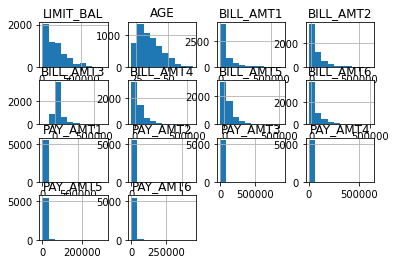

In [16]:
df[num].hist()

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>],
       [<AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>],
       [<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>],
       [<AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

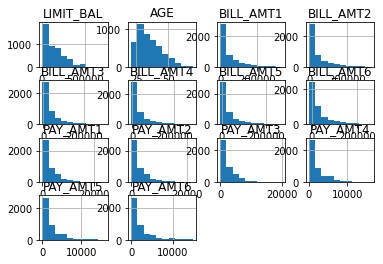

In [17]:
## Función para omitir outliers mediante IQR
def outlier(data, x, how = 'both', p = 0.2):
    for i in x:
        var = data[i]
        q1 = var.quantile(p/2) #acota el % indicado, tanto máx como mín
        q3 = var.quantile(1 - p/2)
        iqr = q3 - q1

        if how == 'max':
            data = data[(var.isnull()) | (var <= q3 + 1.5*iqr)].copy() #no debemos eliminar nulos
        elif how == 'min':
            data = data[(var.isnull()) | (var >= q1 - 1.5*iqr)].copy()
        elif how == 'both':
            data = data[(var.isnull()) | ((var >= q1 - 1.5*iqr) & (var <= q3 + 1.5*iqr))].copy()
        else:
            print('¿Cómo quieres acotar outliers? how = min/max/both')

        data.reset_index(drop = True, inplace = True)
        global df
        df = data.copy()

outlier(df,num)
df[num].hist()

#### Ausentes

In [18]:
## Sin vacíos, yeeeh!
df[cat].isnull().sum() / len(df)

SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
dtype: float64

In [19]:
len(df) / dim_antes

0.8161777777777778

## Ingeniería de variables

Diccionario de datos

##CATEGÓRICAS

• SEX: Genero (1=masculino, 2=femenino)

• EDUCATION: (1=preparatoria, 2=universidad, 3=secundaria, 4=otros)

• MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros)

    
• PAY 0: Estatus de pago en Septiembre, 2005 (-2=no uso (non use), 0=uso, -1=pago cor-
recto, 1=pago retrasado por un mes, 2=pago retrasado por dos meses , ... 8=pago retrasado
por ocho meses, 9=pago retrasado por nueve o más meses).

• PAY 2: Estatus de pago en Agosto, 2005 (La escala es igual que en PAY 0).

• PAY 3: Estatus de pago en Julio, 2005 (La escala es igual que en PAY 0).

• PAY 4: Estatus de pago en Junio, 2005 (La escala es igual que en PAY 0).

• PAY 5: Estatus de pago en Mayo, 2005 (La escala es igual que en PAY 0).

• PAY 6: Estatus de pago en Abril, 2005 (La escala es igual que en PAY 0).
    
##NUMÉRICAS

• LIMIT BAL: Monto de la linea de crédito

• AGE: Edad en años.

    
• BILL AMT1: Monto por pagar en Septiembre, 2005

• BILL AMT2: Monto por pagar en Agosto, 2005

• BILL AMT3: Monto por pagar en Julio, 2005

• BILL AMT4: Monto por pagar en Junio, 2005

• BILL AMT5: Monto por pagar en Mayo, 2005

• BILL AMT6: Monto por pagar en Abril, 2005
    
• PAY AMT1: Cantidad pagada en Septiembre, 2005

• PAY AMT2: Cantidad pagada en Agosto, 2005

• PAY AMT3: Cantidad pagada en Julio, 2005

• PAY AMT4: Cantidad pagada en Junio, 2005

• PAY AMT5: Cantidad pagada en Mayo, 2005

• PAY AMT6: Cantidad pagada en Abril, 2005


##OBJETIVO

• default.payment.next.month: Incumplimiento de pago (1=si, 0=no)

In [20]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'incumple'],
      dtype='object')

### Numéricas

In [21]:
## Diferencia entre el monto y pago anterior
dif = []
for i in range(1,7):
    for j in range(1,7):
        if j != i:
            df[f'DIF_ant_{i}vs{j}'] = df[f'BILL_AMT{i}'] - df[f'PAY_AMT{j}']
            dif += [f'DIF_ant_{i}vs{j}']

num += dif
df[dif].head(3)

,DIF_ant_1vs2,DIF_ant_1vs3,DIF_ant_1vs4,DIF_ant_1vs5,DIF_ant_1vs6,DIF_ant_2vs1,DIF_ant_2vs3,DIF_ant_2vs4,DIF_ant_2vs5,DIF_ant_2vs6,DIF_ant_3vs1,DIF_ant_3vs2,DIF_ant_3vs4,DIF_ant_3vs5,DIF_ant_3vs6,DIF_ant_4vs1,DIF_ant_4vs2,DIF_ant_4vs3,DIF_ant_4vs5,DIF_ant_4vs6,DIF_ant_5vs1,DIF_ant_5vs2,DIF_ant_5vs3,DIF_ant_5vs4,DIF_ant_5vs6,DIF_ant_6vs1,DIF_ant_6vs2,DIF_ant_6vs3,DIF_ant_6vs4,DIF_ant_6vs5
0,0.0,-17085.0,-221.0,-239.0,-235.0,0.0,-17085.0,-221.0,-239.0,-235.0,0.0,0.0,-221.0,-239.0,-235.0,17085.0,17085.0,0.0,16846.0,16850.0,17035.0,17035.0,-50.0,16814.0,16800.0,17006.0,17006.0,-79.0,16785.0,16767.0
1,17612.0,18242.0,18217.0,18194.0,18232.0,18157.0,18806.0,18781.0,18758.0,18796.0,18588.0,18607.0,19212.0,19189.0,19227.0,18688.0,18707.0,19337.0,19289.0,19327.0,18817.0,18836.0,19466.0,19441.0,19456.0,18892.0,18911.0,19541.0,19516.0,19493.0
2,106819.0,108319.0,110669.0,110319.0,110819.0,109058.0,112558.0,114908.0,114558.0,115058.0,70156.0,72156.0,76006.0,75656.0,76156.0,45500.0,47500.0,49000.0,51000.0,51500.0,-5850.0,-3850.0,-2350.0,0.0,150.0,-5500.0,-3500.0,-2000.0,350.0,0.0


In [22]:
## Promedio de los últimos n periodos del monto por pagar
prom = []
for i in range(1,len(monto)+1):
    for j in range(1,len(monto)+1):
        if j < i:
            aux = []
            for x in range(len(df)):
                aux.append(df[[x for x in monto if int(x[-1:])>=j and int(x[-1:])<=i]].iloc[x,:].mean())
            df[f'Prom_monto_from_{i}_to_{j}'] = aux
            prom += [f'Prom_monto_from_{i}_to_{j}']

num += prom
df[prom].sample(3)

,Prom_monto_from_2_to_1,Prom_monto_from_3_to_1,Prom_monto_from_3_to_2,Prom_monto_from_4_to_1,Prom_monto_from_4_to_2,Prom_monto_from_4_to_3,Prom_monto_from_5_to_1,Prom_monto_from_5_to_2,Prom_monto_from_5_to_3,Prom_monto_from_5_to_4,Prom_monto_from_6_to_1,Prom_monto_from_6_to_2,Prom_monto_from_6_to_3,Prom_monto_from_6_to_4,Prom_monto_from_6_to_5
2773,49935.0,50142.000000,49977.5,45046.25,43238.000000,40157.5,42113.2,40023.75,36898.666667,30070.0,40167.666667,38107.0,35284.00,30193.333333,30410.5
650,500.0,333.333333,500.0,250.00,333.333333,0.0,200.0,250.00,0.000000,0.0,166.666667,200.0,0.00,0.000000,0.0
2593,51395.5,52229.000000,53113.5,52778.25,53551.000000,54161.0,52813.8,53402.25,53759.333333,53691.0,53088.000000,53613.6,53934.25,53947.000000,53707.5


In [23]:
## Promedio de los últimos n periodos del pago
for i in range(1,len(pago)+1):
    for j in range(1,len(pago)+1):
        if j < i:
            aux = []
            for x in range(len(df)):
                aux.append(df[[x for x in pago if int(x[-1:])>=j and int(x[-1:])<=i]].iloc[x,:].mean())
            df[f'Prom_pago_from_{i}_to_{j}'] = aux
            prom += [f'Prom_pago_from_{i}_to_{j}']

num += prom
df[prom].sample(3)

,Prom_monto_from_2_to_1,Prom_monto_from_3_to_1,Prom_monto_from_3_to_2,Prom_monto_from_4_to_1,Prom_monto_from_4_to_2,Prom_monto_from_4_to_3,Prom_monto_from_5_to_1,Prom_monto_from_5_to_2,Prom_monto_from_5_to_3,Prom_monto_from_5_to_4,Prom_monto_from_6_to_1,Prom_monto_from_6_to_2,Prom_monto_from_6_to_3,Prom_monto_from_6_to_4,Prom_monto_from_6_to_5,Prom_pago_from_2_to_1,Prom_pago_from_3_to_1,Prom_pago_from_3_to_2,Prom_pago_from_4_to_1,Prom_pago_from_4_to_2,Prom_pago_from_4_to_3,Prom_pago_from_5_to_1,Prom_pago_from_5_to_2,Prom_pago_from_5_to_3,Prom_pago_from_5_to_4,Prom_pago_from_6_to_1,Prom_pago_from_6_to_2,Prom_pago_from_6_to_3,Prom_pago_from_6_to_4,Prom_pago_from_6_to_5
2706,390.0,390.000000,390.0,390.0,390.000000,390.0,360.0,352.5,340.000000,315.0,455.000000,468.0,487.50,520.000000,585.0,390.0,390.000000,390.0,352.50,340.0,315.0,498.0,525.0,570.000000,660.0,415.000000,420.0,427.5,440.000000,540.0
3019,53811.0,56302.333333,58492.0,57158.5,58903.666667,60506.0,57860.6,59345.0,60560.333333,60198.0,58124.166667,59364.4,60280.75,59946.000000,60055.5,6164.5,4109.666667,3532.0,3707.25,3188.0,1250.0,2965.8,2391.0,833.333333,1250.0,2471.500000,1912.8,625.0,833.333333,0.0
2034,8129.0,7999.666667,7871.0,7870.0,7741.000000,7611.0,7711.0,7574.5,7432.333333,7278.0,7561.666667,7422.6,7278.00,7123.666667,6945.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,116.666667,140.0,175.0,233.333333,350.0


<AxesSubplot:>

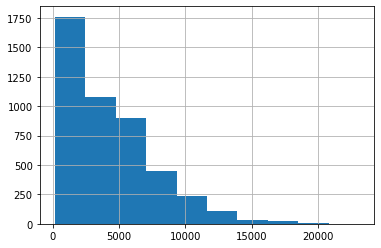

In [24]:
## Límite de crédito entre la edad
df['Lim_x_edad'] = df['LIMIT_BAL'] / df['AGE']
num += ['Lim_x_edad']
df['Lim_x_edad'].hist()

In [25]:
## Todas las variables numéricas entre el límite de crédito
for x in num:
    df[f'{x}_lim'] = df[x] / df['LIMIT_BAL']

lim = [col for col in df.columns if col.endswith('lim')]
num += lim
df[lim].sample(4)

,LIMIT_BAL_lim,AGE_lim,BILL_AMT1_lim,BILL_AMT2_lim,BILL_AMT3_lim,BILL_AMT4_lim,BILL_AMT5_lim,BILL_AMT6_lim,PAY_AMT1_lim,PAY_AMT2_lim,PAY_AMT3_lim,PAY_AMT4_lim,PAY_AMT5_lim,PAY_AMT6_lim,DIF_ant_1vs2_lim,DIF_ant_1vs3_lim,DIF_ant_1vs4_lim,DIF_ant_1vs5_lim,DIF_ant_1vs6_lim,DIF_ant_2vs1_lim,DIF_ant_2vs3_lim,DIF_ant_2vs4_lim,DIF_ant_2vs5_lim,DIF_ant_2vs6_lim,DIF_ant_3vs1_lim,DIF_ant_3vs2_lim,DIF_ant_3vs4_lim,DIF_ant_3vs5_lim,DIF_ant_3vs6_lim,DIF_ant_4vs1_lim,DIF_ant_4vs2_lim,DIF_ant_4vs3_lim,DIF_ant_4vs5_lim,DIF_ant_4vs6_lim,DIF_ant_5vs1_lim,DIF_ant_5vs2_lim,DIF_ant_5vs3_lim,DIF_ant_5vs4_lim,DIF_ant_5vs6_lim,DIF_ant_6vs1_lim,DIF_ant_6vs2_lim,DIF_ant_6vs3_lim,DIF_ant_6vs4_lim,DIF_ant_6vs5_lim,Prom_monto_from_2_to_1_lim,Prom_monto_from_3_to_1_lim,Prom_monto_from_3_to_2_lim,Prom_monto_from_4_to_1_lim,Prom_monto_from_4_to_2_lim,Prom_monto_from_4_to_3_lim,Prom_monto_from_5_to_1_lim,Prom_monto_from_5_to_2_lim,Prom_monto_from_5_to_3_lim,Prom_monto_from_5_to_4_lim,Prom_monto_from_6_to_1_lim,Prom_monto_from_6_to_2_lim,Prom_monto_from_6_to_3_lim,Prom_monto_from_6_to_4_lim,Prom_monto_from_6_to_5_lim,Prom_pago_from_2_to_1_lim,Prom_pago_from_3_to_1_lim,Prom_pago_from_3_to_2_lim,Prom_pago_from_4_to_1_lim,Prom_pago_from_4_to_2_lim,Prom_pago_from_4_to_3_lim,Prom_pago_from_5_to_1_lim,Prom_pago_from_5_to_2_lim,Prom_pago_from_5_to_3_lim,Prom_pago_from_5_to_4_lim,Prom_pago_from_6_to_1_lim,Prom_pago_from_6_to_2_lim,Prom_pago_from_6_to_3_lim,Prom_pago_from_6_to_4_lim,Prom_pago_from_6_to_5_lim,Lim_x_edad_lim
849,1.0,0.000215,0.681146,0.574031,0.585638,0.597292,0.610538,0.615931,0.020838,0.021154,0.021285,0.022777,0.022408,0.023077,0.659992,0.659862,0.658369,0.658738,0.658069,0.553192,0.552746,0.551254,0.551623,0.550954,0.564800,0.564485,0.562862,0.563231,0.562562,0.576454,0.576138,0.576008,0.574885,0.574215,0.589700,0.589385,0.589254,0.587762,0.587462,0.595092,0.594777,0.594646,0.593154,0.593523,0.627588,0.613605,0.579835,0.609527,0.585654,0.591465,0.609729,0.591875,0.597823,0.603915,0.610763,0.596686,0.602350,0.607921,0.613235,0.020996,0.021092,0.021219,0.021513,0.021738,0.022031,0.021692,0.021906,0.022156,0.022592,0.021923,0.022140,0.022387,0.022754,0.022742,0.035714
981,1.0,0.000950,0.488425,0.510400,0.528775,0.547100,0.655325,0.762000,0.037500,0.033900,0.034500,0.125000,0.125000,0.028200,0.454525,0.453925,0.363425,0.363425,0.460225,0.472900,0.475900,0.385400,0.385400,0.482200,0.491275,0.494875,0.403775,0.403775,0.500575,0.509600,0.513200,0.512600,0.422100,0.518900,0.617825,0.621425,0.620825,0.530325,0.627125,0.724500,0.728100,0.727500,0.637000,0.637000,0.499412,0.509200,0.519587,0.518675,0.528758,0.537937,0.546005,0.560400,0.577067,0.601213,0.582004,0.600720,0.623300,0.654808,0.708662,0.035700,0.035300,0.034200,0.057725,0.064467,0.079750,0.071180,0.079600,0.094833,0.125000,0.064017,0.069320,0.078175,0.092733,0.076600,0.026316
2594,1.0,0.000194,0.005444,0.002033,0.002042,-0.000028,-0.000028,-0.000028,0.002222,0.000008,0.000000,0.000000,0.000000,0.000000,0.005436,0.005444,0.005444,0.005444,0.005444,-0.000189,0.002033,0.002033,0.002033,0.002033,-0.000181,0.002033,0.002042,0.002042,0.002042,-0.002250,-0.000036,-0.000028,-0.000028,-0.000028,-0.002250,-0.000036,-0.000028,-0.000028,-0.000028,-0.002250,-0.000036,-0.000028,-0.000028,-0.000028,0.003739,0.003173,0.002037,0.002373,0.001349,0.001007,0.001893,0.001005,0.000662,-0.000028,0.001573,0.000798,0.000490,-0.000028,-0.000028,0.001115,0.000744,0.000004,0.000558,0.000003,0.000000,0.000446,0.000002,0.000000,0.000000,0.000372,0.000002,0.000000,0.000000,0.000000,0.014286
4018,1.0,0.001400,0.440700,0.508350,1.088700,0.535350,0.526950,0.537850,0.075000,0.060000,0.018900,0.019450,0.020000,0.030000,0.380700,0.421800,0.421250,0.420700,0.410700,0.433350,0.489450,0.488900,0.488350,0.478350,1.013700,1.028700,1.069250,1.068700,1.058700,0.460350,0.475350,0.516450,0.515350,0.505350,0.451950,0.466950,0.508050,0.507500,0.496950,0.462850,0.477850,0.518950,0.518400,0.517850,0.474525,0.679250,0.798525,0.643275,0.710800,0.812025

##Seno de todas las variables numéricas (nos volvimos locos)
for x in num:
    df[f'{x}_sin'] = np.sin(df[x])
    
sin = [col for col in df.columns if col.endswith('sin')]
num += sin
df[sin].sample(4)

In [26]:
df.shape

(4591, 160)

In [27]:
## RESPALDO DE DATOS
df_respaldo = df.copy()

In [28]:
df = df_respaldo.copy()

### Categóricas

In [29]:
## Al parecer podemos agrupar los retrasos en pago mayores a dos meses para todos los meses
for col in estatus:
    display(df[col].value_counts(1).reset_index().sort_values(by = 'index').cumsum().head(5))

,index,PAY_1
1,-1,0.168809
4,-1-2,0.255936
0,-1-20,0.755391
2,-1-201,0.888477
3,-1-2012,0.986713


,index,PAY_2
1,-1,0.175997
3,-1-2,0.302548
0,-1-20,0.837290
6,-1-201,0.838379
2,-1-2012,0.980832


,index,PAY_3
1,-1,0.174036
2,-1-2,0.312568
0,-1-20,0.846657
3,-1-202,0.983882
4,-1-2023,0.993683


,index,PAY_4
1,-1,0.164234
2,-1-2,0.314964
0,-1-20,0.870181
3,-1-202,0.985624
4,-1-2023,0.992376


,index,PAY_5
1,-1,0.161403
2,-1-2,0.321499
0,-1-20,0.892616
3,-1-202,0.986277
4,-1-2023,0.993683


,index,PAY_6
2,-1,0.164017
1,-1-2,0.340884
0,-1-20,0.882379
3,-1-202,0.987584
4,-1-2023,0.994990


In [30]:
for col in estatus:
    aux = []
    for i in range(len(df)):
        if int(df[col][i]) >= 1:
            aux.append('>=1')
        else:
            aux.append(df[col][i])
    df[col] = aux

for col in estatus:
    display(df[col].value_counts(1).reset_index().sort_values(by = 'index'))

,index,PAY_1
2,-1,0.168809
3,-2,0.087127
0,0,0.499455
1,>=1,0.244609


,index,PAY_2
1,-1,0.175997
3,-2,0.126552
0,0,0.534742
2,>=1,0.162710


,index,PAY_3
1,-1,0.174036
3,-2,0.138532
0,0,0.534088
2,>=1,0.153343


,index,PAY_4
1,-1,0.164234
2,-2,0.150730
0,0,0.555217
3,>=1,0.129819


,index,PAY_5
1,-1,0.161403
2,-2,0.160096
0,0,0.571117
3,>=1,0.107384


,index,PAY_6
2,-1,0.164017
1,-2,0.176868
0,0,0.541494
3,>=1,0.117621


In [31]:
## Monto negativo?
df[monto].min()

BILL_AMT1    -2000.0
BILL_AMT2    -2953.0
BILL_AMT3    -5000.0
BILL_AMT4    -5000.0
BILL_AMT5    -7220.0
BILL_AMT6   -11610.0
dtype: float64

In [32]:
## Se crean variables auxiliares para definir si un monto es negativo
for col in monto:
    aux = []
    for i in range(len(df)):
        if int(df[col][i]) < 0:
            aux.append('negativo')
        else:
            aux.append('positivo')
    df[f'{col}_negativos'] = aux
    cat += [f'{col}_negativos']

In [33]:
for col in [x for x in cat if x.endswith('_negativos')]:
    display(df[col].value_counts(1).reset_index())

,index,BILL_AMT1_negativos
0,positivo,0.982792
1,negativo,0.017208


,index,BILL_AMT2_negativos
0,positivo,0.977783
1,negativo,0.022217


,index,BILL_AMT3_negativos
0,positivo,0.979961
1,negativo,0.020039


,index,BILL_AMT4_negativos
0,positivo,0.976694
1,negativo,0.023306


,index,BILL_AMT5_negativos
0,positivo,0.977565
1,negativo,0.022435


,index,BILL_AMT6_negativos
0,positivo,0.975822
1,negativo,0.024178


In [34]:
## Sólo la variable objetivo no está considerada como numérica o categórica
[x for x in df.columns if x not in cat+num]

['incumple']

In [35]:
## Muchas muchas columnas
len(df.columns)

166

In [36]:
## RESPALDO DE DATOS
df_respaldo = df.copy()

In [37]:
df = df_respaldo.copy()

## Modelaje

### Regresión logística

#### Escalamiento

In [38]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5',
       ...
       'Prom_pago_from_6_to_3_lim', 'Prom_pago_from_6_to_4_lim',
       'Prom_pago_from_6_to_5_lim', 'Lim_x_edad_lim', 'BILL_AMT1_negativos',
       'BILL_AMT2_negativos', 'BILL_AMT3_negativos', 'BILL_AMT4_negativos',
       'BILL_AMT5_negativos', 'BILL_AMT6_negativos'],
      dtype='object', length=166)

In [39]:
## Se define la variable objetivo
tgt = 'incumple'
X = df[num].join(pd.get_dummies(df[cat].astype(str)))
y = df[[tgt]]
y.mean()

incumple    0.238946
dtype: float64

In [40]:
## Se separan los conjuntos de entrenamiento y prueba
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 22)
len(y_test) / len(y_train)

0.11135318324860809

In [41]:
X_train.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DIF_ant_1vs2,DIF_ant_1vs3,DIF_ant_1vs4,DIF_ant_1vs5,DIF_ant_1vs6,DIF_ant_2vs1,DIF_ant_2vs3,DIF_ant_2vs4,DIF_ant_2vs5,DIF_ant_2vs6,DIF_ant_3vs1,DIF_ant_3vs2,DIF_ant_3vs4,DIF_ant_3vs5,DIF_ant_3vs6,DIF_ant_4vs1,DIF_ant_4vs2,DIF_ant_4vs3,DIF_ant_4vs5,DIF_ant_4vs6,DIF_ant_5vs1,DIF_ant_5vs2,DIF_ant_5vs3,DIF_ant_5vs4,DIF_ant_5vs6,DIF_ant_6vs1,DIF_ant_6vs2,DIF_ant_6vs3,DIF_ant_6vs4,DIF_ant_6vs5,Prom_monto_from_2_to_1,Prom_monto_from_3_to_1,Prom_monto_from_3_to_2,Prom_monto_from_4_to_1,Prom_monto_from_4_to_2,Prom_monto_from_4_to_3,Prom_monto_from_5_to_1,Prom_monto_from_5_to_2,Prom_monto_from_5_to_3,Prom_monto_from_5_to_4,Prom_monto_from_6_to_1,Prom_monto_from_6_to_2,Prom_monto_from_6_to_3,Prom_monto_from_6_to_4,Prom_monto_from_6_to_5,Prom_monto_from_2_to_1,Prom_monto_from_3_to_1,Prom_monto_from_3_to_2,Prom_monto_from_4_to_1,Prom_monto_from_4_to_2,Prom_monto_from_4_to_3,Prom_monto_from_5_to_1,Prom_monto_from_5_to_2,Prom_monto_from_5_to_3,Prom_monto_from_5_to_4,Prom_monto_from_6_to_1,Prom_monto_from_6_to_2,Prom_monto_from_6_to_3,Prom_monto_from_6_to_4,Prom_monto_from_6_to_5,Prom_pago_from_2_to_1,Prom_pago_from_3_to_1,Prom_pago_from_3_to_2,Prom_pago_from_4_to_1,Prom_pago_from_4_to_2,Prom_pago_from_4_to_3,Prom_pago_from_5_to_1,Prom_pago_from_5_to_2,Prom_pago_from_5_to_3,Prom_pago_from_5_to_4,Prom_pago_from_6_to_1,Prom_pago_from_6_to_2,Prom_pago_from_6_to_3,Prom_pago_from_6_to_4,Prom_pago_from_6_to_5,Lim_x_edad,LIMIT_BAL_lim,AGE_lim,BILL_AMT1_lim,BILL_AMT2_lim,BILL_AMT3_lim,BILL_AMT4_lim,BILL_AMT5_lim,BILL_AMT6_lim,PAY_AMT1_lim,PAY_AMT2_lim,...,DIF_ant_2vs6_lim,DIF_ant_3vs1_lim,DIF_ant_3vs2_lim,DIF_ant_3vs4_lim,DIF_ant_3vs5_lim,DIF_ant_3vs6_lim,DIF_ant_4vs1_lim,DIF_ant_4vs2_lim,DIF_ant_4vs3_lim,DIF_ant_4vs5_lim,DIF_ant_4vs6_lim,DIF_ant_5vs1_lim,DIF_ant_5vs2_lim,DIF_ant_5vs3_lim,DIF_ant_5vs4_lim,DIF_ant_5vs6_lim,DIF_ant_6vs1_lim,DIF_ant_6vs2_lim,DIF_ant_6vs3_lim,DIF_ant_6vs4_lim,DIF_ant_6vs5_lim,Prom_monto_from_2_to_1_lim,Prom_monto_from_3_to_1_lim,Prom_monto_from_3_to_2_lim,Prom_monto_from_4_to_1_lim,Prom_monto_from_4_to_2_lim,Prom_monto_from_4_to_3_lim,Prom_monto_from_5_to_1_lim,Prom_monto_from_5_to_2_lim,Prom_monto_from_5_to_3_lim,Prom_monto_from_5_to_4_lim,Prom_monto_from_6_to_1_lim,Prom_monto_from_6_to_2_lim,Prom_monto_from_6_to_3_lim,Prom_monto_from_6_to_4_lim,Prom_monto_from_6_to_5_lim,Prom_pago_from_2_to_1_lim,Prom_pago_from_3_to_1_lim,Prom_pago_from_3_to_2_lim,Prom_pago_from_4_to_1_lim,Prom_pago_from_4_to_2_lim,Prom_pago_from_4_to_3_lim,Prom_pago_from_5_to_1_lim,Prom_pago_from_5_to_2_lim,Prom_pago_from_5_to_3_lim,Prom_pago_from_5_to_4_lim,Prom_pago_from_6_to_1_lim,Prom_pago_from_6_to_2_lim,Prom_pago_from_6_to_3_lim,Prom_pago_from_6_to_4_lim,Prom_pago_from_6_to_5_lim,Lim_x_edad_lim,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_-2,PAY_1_0,PAY_1_>=1,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_>=1,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_>=1,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_>=1,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_>=1,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_>=1,BILL_AMT1_negativos_negativo,BILL_AMT1_negativos_positivo,BILL_AMT2_negativos_negativo,BILL_AMT2_negativos_positivo,BILL_AMT3_negativos_negativo,BILL_AMT3_negativos_positivo,BILL_AMT4_negativos_negativo,BILL_AMT4_negativos_positivo,BILL_AMT5_negativos_negativo,BILL_AMT5_negativos_positivo,BILL_AMT6_negativos_negativo,BILL_AMT6_negativos_positivo
count,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.

In [42]:
X.shape

(4591, 213)

In [44]:
from sklearn.preprocessing import MinMaxScaler
mm_x = MinMaxScaler()
mm_y = MinMaxScaler()

## En train se ajusta y transforma
X = pd.DataFrame(mm_x.fit_transform(X_train),
                 columns = X.columns)
y = mm_y.fit_transform(y_train)

## Y en test sólo se transforma
X_test_mm = pd.DataFrame(mm_x.transform(X_test),
                         columns = X.columns)
y_test_mm = mm_y.transform(y_test)

X.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DIF_ant_1vs2,DIF_ant_1vs3,DIF_ant_1vs4,DIF_ant_1vs5,DIF_ant_1vs6,DIF_ant_2vs1,DIF_ant_2vs3,DIF_ant_2vs4,DIF_ant_2vs5,DIF_ant_2vs6,DIF_ant_3vs1,DIF_ant_3vs2,DIF_ant_3vs4,DIF_ant_3vs5,DIF_ant_3vs6,DIF_ant_4vs1,DIF_ant_4vs2,DIF_ant_4vs3,DIF_ant_4vs5,DIF_ant_4vs6,DIF_ant_5vs1,DIF_ant_5vs2,DIF_ant_5vs3,DIF_ant_5vs4,DIF_ant_5vs6,DIF_ant_6vs1,DIF_ant_6vs2,DIF_ant_6vs3,DIF_ant_6vs4,DIF_ant_6vs5,Prom_monto_from_2_to_1,Prom_monto_from_3_to_1,Prom_monto_from_3_to_2,Prom_monto_from_4_to_1,Prom_monto_from_4_to_2,Prom_monto_from_4_to_3,Prom_monto_from_5_to_1,Prom_monto_from_5_to_2,Prom_monto_from_5_to_3,Prom_monto_from_5_to_4,Prom_monto_from_6_to_1,Prom_monto_from_6_to_2,Prom_monto_from_6_to_3,Prom_monto_from_6_to_4,Prom_monto_from_6_to_5,Prom_monto_from_2_to_1,Prom_monto_from_3_to_1,Prom_monto_from_3_to_2,Prom_monto_from_4_to_1,Prom_monto_from_4_to_2,Prom_monto_from_4_to_3,Prom_monto_from_5_to_1,Prom_monto_from_5_to_2,Prom_monto_from_5_to_3,Prom_monto_from_5_to_4,Prom_monto_from_6_to_1,Prom_monto_from_6_to_2,Prom_monto_from_6_to_3,Prom_monto_from_6_to_4,Prom_monto_from_6_to_5,Prom_pago_from_2_to_1,Prom_pago_from_3_to_1,Prom_pago_from_3_to_2,Prom_pago_from_4_to_1,Prom_pago_from_4_to_2,Prom_pago_from_4_to_3,Prom_pago_from_5_to_1,Prom_pago_from_5_to_2,Prom_pago_from_5_to_3,Prom_pago_from_5_to_4,Prom_pago_from_6_to_1,Prom_pago_from_6_to_2,Prom_pago_from_6_to_3,Prom_pago_from_6_to_4,Prom_pago_from_6_to_5,Lim_x_edad,LIMIT_BAL_lim,AGE_lim,BILL_AMT1_lim,BILL_AMT2_lim,BILL_AMT3_lim,BILL_AMT4_lim,BILL_AMT5_lim,BILL_AMT6_lim,PAY_AMT1_lim,PAY_AMT2_lim,...,DIF_ant_2vs6_lim,DIF_ant_3vs1_lim,DIF_ant_3vs2_lim,DIF_ant_3vs4_lim,DIF_ant_3vs5_lim,DIF_ant_3vs6_lim,DIF_ant_4vs1_lim,DIF_ant_4vs2_lim,DIF_ant_4vs3_lim,DIF_ant_4vs5_lim,DIF_ant_4vs6_lim,DIF_ant_5vs1_lim,DIF_ant_5vs2_lim,DIF_ant_5vs3_lim,DIF_ant_5vs4_lim,DIF_ant_5vs6_lim,DIF_ant_6vs1_lim,DIF_ant_6vs2_lim,DIF_ant_6vs3_lim,DIF_ant_6vs4_lim,DIF_ant_6vs5_lim,Prom_monto_from_2_to_1_lim,Prom_monto_from_3_to_1_lim,Prom_monto_from_3_to_2_lim,Prom_monto_from_4_to_1_lim,Prom_monto_from_4_to_2_lim,Prom_monto_from_4_to_3_lim,Prom_monto_from_5_to_1_lim,Prom_monto_from_5_to_2_lim,Prom_monto_from_5_to_3_lim,Prom_monto_from_5_to_4_lim,Prom_monto_from_6_to_1_lim,Prom_monto_from_6_to_2_lim,Prom_monto_from_6_to_3_lim,Prom_monto_from_6_to_4_lim,Prom_monto_from_6_to_5_lim,Prom_pago_from_2_to_1_lim,Prom_pago_from_3_to_1_lim,Prom_pago_from_3_to_2_lim,Prom_pago_from_4_to_1_lim,Prom_pago_from_4_to_2_lim,Prom_pago_from_4_to_3_lim,Prom_pago_from_5_to_1_lim,Prom_pago_from_5_to_2_lim,Prom_pago_from_5_to_3_lim,Prom_pago_from_5_to_4_lim,Prom_pago_from_6_to_1_lim,Prom_pago_from_6_to_2_lim,Prom_pago_from_6_to_3_lim,Prom_pago_from_6_to_4_lim,Prom_pago_from_6_to_5_lim,Lim_x_edad_lim,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_-2,PAY_1_0,PAY_1_>=1,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_>=1,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_>=1,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_>=1,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_>=1,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_>=1,BILL_AMT1_negativos_negativo,BILL_AMT1_negativos_positivo,BILL_AMT2_negativos_negativo,BILL_AMT2_negativos_positivo,BILL_AMT3_negativos_negativo,BILL_AMT3_negativos_positivo,BILL_AMT4_negativos_negativo,BILL_AMT4_negativos_positivo,BILL_AMT5_negativos_negativo,BILL_AMT5_negativos_positivo,BILL_AMT6_negativos_negativo,BILL_AMT6_negativos_positivo
count,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4131.

#### Reducción de dimensiones

##### K-best

In [45]:
# Se eligirán las mejores variables
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
kb = SelectKBest(k = 33, score_func = f_regression)
kb.fit(X, y)

ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
ls_best

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


['LIMIT_BAL',
 'Prom_pago_from_2_to_1',
 'Prom_pago_from_3_to_1',
 'Prom_pago_from_3_to_2',
 'Prom_pago_from_4_to_1',
 'Prom_pago_from_5_to_1',
 'Prom_pago_from_6_to_1',
 'Prom_pago_from_6_to_2',
 'Lim_x_edad',
 'AGE_lim',
 'BILL_AMT5_lim',
 'BILL_AMT6_lim',
 'DIF_ant_5vs1_lim',
 'DIF_ant_5vs2_lim',
 'DIF_ant_5vs3_lim',
 'DIF_ant_5vs4_lim',
 'DIF_ant_5vs6_lim',
 'DIF_ant_6vs1_lim',
 'DIF_ant_6vs2_lim',
 'DIF_ant_6vs3_lim',
 'DIF_ant_6vs4_lim',
 'DIF_ant_6vs5_lim',
 'Prom_monto_from_6_to_4_lim',
 'Prom_monto_from_6_to_5_lim',
 'PAY_1_0',
 'PAY_1_>=1',
 'PAY_2_0',
 'PAY_2_>=1',
 'PAY_3_0',
 'PAY_3_>=1',
 'PAY_4_>=1',
 'PAY_5_>=1',
 'PAY_6_>=1']

In [46]:
X = X[ls_best]
X.sample(4)

,LIMIT_BAL,Prom_pago_from_2_to_1,Prom_pago_from_3_to_1,Prom_pago_from_3_to_2,Prom_pago_from_4_to_1,Prom_pago_from_5_to_1,Prom_pago_from_6_to_1,Prom_pago_from_6_to_2,Lim_x_edad,AGE_lim,BILL_AMT5_lim,BILL_AMT6_lim,DIF_ant_5vs1_lim,DIF_ant_5vs2_lim,DIF_ant_5vs3_lim,DIF_ant_5vs4_lim,DIF_ant_5vs6_lim,DIF_ant_6vs1_lim,DIF_ant_6vs2_lim,DIF_ant_6vs3_lim,DIF_ant_6vs4_lim,DIF_ant_6vs5_lim,Prom_monto_from_6_to_4_lim,Prom_monto_from_6_to_5_lim,PAY_1_0,PAY_1_>=1,PAY_2_0,PAY_2_>=1,PAY_3_0,PAY_3_>=1,PAY_4_>=1,PAY_5_>=1,PAY_6_>=1
1476,0.057971,0.139178,0.107848,0.098305,0.089155,0.092924,0.082012,0.076457,0.083333,0.075862,0.106414,0.174476,0.178523,0.129651,0.208223,0.108389,0.120655,0.219222,0.184203,0.247216,0.179357,0.175703,0.163739,0.137580,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1643,0.159420,0.065281,0.171841,0.175515,0.133982,0.197834,0.221466,0.249857,0.156015,0.038804,0.068277,0.141046,0.145702,0.105198,0.164002,0.070408,0.075800,0.190447,0.166570,0.203974,0.146286,0.134342,0.078853,0.101598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1292,0.086957,0.221619,0.203545,0.245830,0.176326,0.176187,0.147194,0.166029,0.074985,0.084299,0.156184,0.218634,0.229122,0.173144,0.249643,0.157715,0.172117,0.266865,0.221759,0.284112,0.222776,0.221342,0.176665,0.184780,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3523,0.173913,0.121702,0.150705,0.163523,0.176253,0.170864,0.164683,0.185714,0.219248,0.025887,0.079733,0.142310,0.157906,0.112270,0.179800,0.076220,0.092476,0.193254,0.162593,0.211699,0.140452,0.145305,0.085013,0.108387,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Entrenamiento

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X, y)
ls_scores = cross_val_score(X = X,
                            y = y,
                            cv = 3,
                            estimator = logreg,
                            scoring = 'roc_auc')
## Se observa la acertividad en diferentes secciones del conjunto de entrenamiento
np.mean(ls_scores), np.std(ls_scores)

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was e

(0.7613602126534998, 0.024571135220181745)

In [48]:
## Se despliega la relación que tiene cada una de las mejores variables que explican
# la variable objetivo
pd.DataFrame(list(zip(ls_best, logreg.coef_[0])),
            columns = ['Variable', 'Explica']).sort_values(by = 'Explica')

,Variable,Explica
8,Lim_x_edad,-1.368185
24,PAY_1_0,-1.170908
6,Prom_pago_from_6_to_1,-0.797544
2,Prom_pago_from_3_to_1,-0.593482
1,Prom_pago_from_2_to_1,-0.537182
7,Prom_pago_from_6_to_2,-0.506446
20,DIF_ant_6vs4_lim,-0.146205
11,BILL_AMT6_lim,-0.116440
21,DIF_ant_6vs5_lim,-0.097274
19,DIF_ant_6vs3_lim,-0.067900


##### Hiperparametrización

In [49]:
param_grid = {"penalty": ["l1", "l2", "elasticnet"],
              "C": [x/500 for x in range(500)]+[0],
              "class_weight": ["balanced", None],
              "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }
np.prod(list(map(len, param_grid.values())))

15030

In [50]:
from sklearn.model_selection import RandomizedSearchCV
hp = RandomizedSearchCV(cv = 3, 
                        param_distributions = param_grid,
                        n_iter = 1000,
                        scoring = 'roc_auc', 
                        verbose = 5,
                        error_score = -10000, 
                        estimator = logreg, 
                        n_jobs = -1)
hp.fit(X = X, y = y)
hp.best_score_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 159 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 2340 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  1.7min finished
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7613630987915222

In [51]:
param_grid = {"loss": ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"],
              "penalty": ["l2", "l1", "elasticnet"],
              "alpha": [x/100+0.01 for x in range(100)],
              "l1_ratio": [x/10 for x in range(10)],
              "learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
              "eta0": [0.001]
             }
n_hyper = np.prod(list(map(len, param_grid.values())))
n_hyper

60000

In [52]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
hyper = RandomizedSearchCV(estimator = model,
                           n_jobs = -1,
                           scoring = "roc_auc",
                           param_distributions = param_grid,
                           error_score = -1000,
                           verbose = 1,
                           n_iter = int(n_hyper*.1),
                           random_state = 222,
                           cv = 3)
hyper.fit(X, y.ravel())
hyper.best_score_

Fitting 3 folds for each of 6000 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 746 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 1746 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 3080 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4880 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 7080 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 9520 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 11654 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 14553 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 16432 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 18000 out of 18000 | elapsed: 11.1min finished


0.7608832850044704

#### Prueba

In [53]:
X_test_mm.sample()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DIF_ant_1vs2,DIF_ant_1vs3,DIF_ant_1vs4,DIF_ant_1vs5,DIF_ant_1vs6,DIF_ant_2vs1,DIF_ant_2vs3,DIF_ant_2vs4,DIF_ant_2vs5,DIF_ant_2vs6,DIF_ant_3vs1,DIF_ant_3vs2,DIF_ant_3vs4,DIF_ant_3vs5,DIF_ant_3vs6,DIF_ant_4vs1,DIF_ant_4vs2,DIF_ant_4vs3,DIF_ant_4vs5,DIF_ant_4vs6,DIF_ant_5vs1,DIF_ant_5vs2,DIF_ant_5vs3,DIF_ant_5vs4,DIF_ant_5vs6,DIF_ant_6vs1,DIF_ant_6vs2,DIF_ant_6vs3,DIF_ant_6vs4,DIF_ant_6vs5,Prom_monto_from_2_to_1,Prom_monto_from_3_to_1,Prom_monto_from_3_to_2,Prom_monto_from_4_to_1,Prom_monto_from_4_to_2,Prom_monto_from_4_to_3,Prom_monto_from_5_to_1,Prom_monto_from_5_to_2,Prom_monto_from_5_to_3,Prom_monto_from_5_to_4,Prom_monto_from_6_to_1,Prom_monto_from_6_to_2,Prom_monto_from_6_to_3,Prom_monto_from_6_to_4,Prom_monto_from_6_to_5,Prom_monto_from_2_to_1,Prom_monto_from_3_to_1,Prom_monto_from_3_to_2,Prom_monto_from_4_to_1,Prom_monto_from_4_to_2,Prom_monto_from_4_to_3,Prom_monto_from_5_to_1,Prom_monto_from_5_to_2,Prom_monto_from_5_to_3,Prom_monto_from_5_to_4,Prom_monto_from_6_to_1,Prom_monto_from_6_to_2,Prom_monto_from_6_to_3,Prom_monto_from_6_to_4,Prom_monto_from_6_to_5,Prom_pago_from_2_to_1,Prom_pago_from_3_to_1,Prom_pago_from_3_to_2,Prom_pago_from_4_to_1,Prom_pago_from_4_to_2,Prom_pago_from_4_to_3,Prom_pago_from_5_to_1,Prom_pago_from_5_to_2,Prom_pago_from_5_to_3,Prom_pago_from_5_to_4,Prom_pago_from_6_to_1,Prom_pago_from_6_to_2,Prom_pago_from_6_to_3,Prom_pago_from_6_to_4,Prom_pago_from_6_to_5,Lim_x_edad,LIMIT_BAL_lim,AGE_lim,BILL_AMT1_lim,BILL_AMT2_lim,BILL_AMT3_lim,BILL_AMT4_lim,BILL_AMT5_lim,BILL_AMT6_lim,PAY_AMT1_lim,PAY_AMT2_lim,...,DIF_ant_2vs6_lim,DIF_ant_3vs1_lim,DIF_ant_3vs2_lim,DIF_ant_3vs4_lim,DIF_ant_3vs5_lim,DIF_ant_3vs6_lim,DIF_ant_4vs1_lim,DIF_ant_4vs2_lim,DIF_ant_4vs3_lim,DIF_ant_4vs5_lim,DIF_ant_4vs6_lim,DIF_ant_5vs1_lim,DIF_ant_5vs2_lim,DIF_ant_5vs3_lim,DIF_ant_5vs4_lim,DIF_ant_5vs6_lim,DIF_ant_6vs1_lim,DIF_ant_6vs2_lim,DIF_ant_6vs3_lim,DIF_ant_6vs4_lim,DIF_ant_6vs5_lim,Prom_monto_from_2_to_1_lim,Prom_monto_from_3_to_1_lim,Prom_monto_from_3_to_2_lim,Prom_monto_from_4_to_1_lim,Prom_monto_from_4_to_2_lim,Prom_monto_from_4_to_3_lim,Prom_monto_from_5_to_1_lim,Prom_monto_from_5_to_2_lim,Prom_monto_from_5_to_3_lim,Prom_monto_from_5_to_4_lim,Prom_monto_from_6_to_1_lim,Prom_monto_from_6_to_2_lim,Prom_monto_from_6_to_3_lim,Prom_monto_from_6_to_4_lim,Prom_monto_from_6_to_5_lim,Prom_pago_from_2_to_1_lim,Prom_pago_from_3_to_1_lim,Prom_pago_from_3_to_2_lim,Prom_pago_from_4_to_1_lim,Prom_pago_from_4_to_2_lim,Prom_pago_from_4_to_3_lim,Prom_pago_from_5_to_1_lim,Prom_pago_from_5_to_2_lim,Prom_pago_from_5_to_3_lim,Prom_pago_from_5_to_4_lim,Prom_pago_from_6_to_1_lim,Prom_pago_from_6_to_2_lim,Prom_pago_from_6_to_3_lim,Prom_pago_from_6_to_4_lim,Prom_pago_from_6_to_5_lim,Lim_x_edad_lim,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_-2,PAY_1_0,PAY_1_>=1,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_>=1,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_>=1,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_>=1,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_>=1,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_>=1,BILL_AMT1_negativos_negativo,BILL_AMT1_negativos_positivo,BILL_AMT2_negativos_negativo,BILL_AMT2_negativos_positivo,BILL_AMT3_negativos_negativo,BILL_AMT3_negativos_positivo,BILL_AMT4_negativos_negativo,BILL_AMT4_negativos_positivo,BILL_AMT5_negativos_negativo,BILL_AMT5_negativos_positivo,BILL_AMT6_negativos_negativo,BILL_AMT6_negativos_positivo
269,0.391304,0.795918,0.006991,0.008903,0.016932,0.018127,0.02589,0.044347,0.0,0.008542,0.0498,0.0,0.02475,0.026381,0.065639,0.051746,0.047301,0.045901,0.042934,0.032795,0.059439,0.046615,0.042751,0.042357,0.074183,0.064378,0.051352,0.049527,0.048264,0.077327,0.072466,0.052248,0.047006,0.049765,0.083968,0.074748,0.067473,0.026953,0.047965,0.088282,0.08352,0.069364,0.061388,0.044411,0.005929,0.006003,0.009809,0.00628,0.010299,0.017521,0.00638,0.010566,

In [54]:
## Y se corre para el conjunto de prueba
from sklearn.metrics import roc_auc_score
'{:,.2%}'.format(roc_auc_score(y_score = logreg.predict(X_test_mm[ls_best]),
                              y_true = y_test_mm))

'67.35%'

In [55]:
## Para hp randomized
'{:,.2%}'.format(roc_auc_score(y_score = hp.predict(X_test_mm[ls_best]),
                              y_true = y_test_mm))

'67.35%'

In [56]:
## Y para GSC
'{:,.2%}'.format(roc_auc_score(y_score = hyper.predict(X_test_mm[ls_best]),
                              y_true = y_test_mm))

'59.15%'

In [101]:
import pickle

## Guardar modelo
with open('default.pkl', 'wb') as file:
    pickle.dump(logreg, file)

## Abrir un modelo
with open('default.pkl', 'rb') as file:
    default = pickle.load(file)

## Listo para usarse
default

LogisticRegression(class_weight='balanced')

In [102]:
'{:,.2%}'.format(roc_auc_score(y_score = default.predict(X_test_mm[ls_best]),
                              y_true = y_test_mm))

'67.35%'

In [57]:
import pickle

## Guardar modelo
with open('default.pkl', 'wb') as file:
    pickle.dump(logreg, file)

## Abrir un modelo
with open('default.pkl', 'rb') as file:
    default = pickle.load(file)

## Listo para usarse
default

LogisticRegression(class_weight='balanced')

In [58]:
'{:,.2%}'.format(roc_auc_score(y_score = default.predict(X_test_mm[ls_best]),
                              y_true = y_test_mm))

'67.35%'

In [59]:
## Se despliega la relación que tiene cada una de las mejores variables que explican
# la variable objetivo
pd.DataFrame(list(zip(ls_best, logreg.coef_[0])),
            columns = ['Variable', 'Explica']).sort_values(by = 'Explica')

,Variable,Explica
8,Lim_x_edad,-1.368185
24,PAY_1_0,-1.170908
6,Prom_pago_from_6_to_1,-0.797544
2,Prom_pago_from_3_to_1,-0.593482
1,Prom_pago_from_2_to_1,-0.537182
7,Prom_pago_from_6_to_2,-0.506446
20,DIF_ant_6vs4_lim,-0.146205
11,BILL_AMT6_lim,-0.116440
21,DIF_ant_6vs5_lim,-0.097274
19,DIF_ant_6vs3_lim,-0.067900


## Validación

### Exploratorio

In [60]:
val = pd.read_csv('/home/ef/Documents/Diplomado/EXAMEN02/val_default.csv',
                     encoding = 'ascii',
                     sep = '|',
                     low_memory = False)
val.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)
val.sample(4)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1577,205,430000.0,2,2,2,29,-2,-2,-2,-2,-2,-2,2548.0,12020.0,2539.0,2250.0,0.0,2580.0,12082.0,2539.0,2250.0,0.0,2580.0,171.0
1283,6602,290000.0,1,1,2,28,0,0,0,0,0,0,162118.0,150366.0,148949.0,141711.0,122755.0,216138.0,6000.0,6000.0,5000.0,10000.0,100000.0,7681.0
1143,24092,50000.0,2,2,2,35,0,0,-1,0,0,0,50521.0,50466.0,49821.0,43945.0,29669.0,28469.0,1649.0,51869.0,1884.0,1023.0,1173.0,1193.0
552,22725,220000.0,1,1,1,43,-2,-2,-2,-2,-2,-2,7695.0,2701.0,98376.0,3874.0,5226.0,14973.0,2725.0,98875.0,3893.0,5252.0,15047.0,3980.0


In [61]:
X.sample(4)

,LIMIT_BAL,Prom_pago_from_2_to_1,Prom_pago_from_3_to_1,Prom_pago_from_3_to_2,Prom_pago_from_4_to_1,Prom_pago_from_5_to_1,Prom_pago_from_6_to_1,Prom_pago_from_6_to_2,Lim_x_edad,AGE_lim,BILL_AMT5_lim,BILL_AMT6_lim,DIF_ant_5vs1_lim,DIF_ant_5vs2_lim,DIF_ant_5vs3_lim,DIF_ant_5vs4_lim,DIF_ant_5vs6_lim,DIF_ant_6vs1_lim,DIF_ant_6vs2_lim,DIF_ant_6vs3_lim,DIF_ant_6vs4_lim,DIF_ant_6vs5_lim,Prom_monto_from_6_to_4_lim,Prom_monto_from_6_to_5_lim,PAY_1_0,PAY_1_>=1,PAY_2_0,PAY_2_>=1,PAY_3_0,PAY_3_>=1,PAY_4_>=1,PAY_5_>=1,PAY_6_>=1
629,0.202899,0.001290,0.000998,0.000000,0.000778,0.000697,0.000582,0.000000,0.184874,0.031856,0.068277,0.129981,0.149677,0.105198,0.173303,0.070408,0.083899,0.184344,0.155297,0.204880,0.134810,0.134342,0.072000,0.096531,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3113,0.101449,0.077889,0.094303,0.049221,0.104724,0.114728,0.112303,0.100414,0.121693,0.051108,0.177443,0.245066,0.246813,0.214071,0.269419,0.177802,0.189899,0.289910,0.272540,0.309644,0.248006,0.248664,0.183084,0.208408,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1720,0.057971,0.080323,0.084771,0.076311,0.080783,0.085432,0.084537,0.085714,0.083333,0.075862,0.140879,0.214386,0.212962,0.171568,0.235667,0.141374,0.152206,0.260752,0.233986,0.280129,0.217708,0.216952,0.148532,0.174538,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
152,0.014493,0.039383,0.060621,0.087212,0.069297,0.062010,0.062777,0.081429,0.023631,0.235675,0.212975,0.296974,0.287826,0.234417,0.292024,0.204993,0.219627,0.350207,0.307173,0.346825,0.290591,0.306939,0.220112,0.251438,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [62]:
X_train[[x for x in X_train.columns if x.startswith('EDU')]].columns

Index(['EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5'],
      dtype='object')

In [63]:
cat = list(val.columns[2:12])
cat = [x for x in cat if x not in ['AGE']]
for col in cat:
    val[col] = val[col].astype(str)
val[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        1875 non-null   object
 1   EDUCATION  1875 non-null   object
 2   MARRIAGE   1875 non-null   object
 3   PAY_1      1875 non-null   object
 4   PAY_2      1875 non-null   object
 5   PAY_3      1875 non-null   object
 6   PAY_4      1875 non-null   object
 7   PAY_5      1875 non-null   object
 8   PAY_6      1875 non-null   object
dtypes: object(9)
memory usage: 132.0+ KB


In [64]:
num = [col for col in val.columns if col not in cat + ['CUSTOMER_ID']]
val[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  1875 non-null   float64
 1   AGE        1875 non-null   int64  
 2   BILL_AMT1  1875 non-null   float64
 3   BILL_AMT2  1875 non-null   float64
 4   BILL_AMT3  1875 non-null   float64
 5   BILL_AMT4  1875 non-null   float64
 6   BILL_AMT5  1875 non-null   float64
 7   BILL_AMT6  1875 non-null   float64
 8   PAY_AMT1   1875 non-null   float64
 9   PAY_AMT2   1875 non-null   float64
 10  PAY_AMT3   1875 non-null   float64
 11  PAY_AMT4   1875 non-null   float64
 12  PAY_AMT5   1875 non-null   float64
 13  PAY_AMT6   1875 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 205.2 KB


In [65]:
## Agrupar 5 y 6 en matrimonio, ambos = desconocido
dict_replace = {'6':'5'}
val['EDUCATION'] = val['EDUCATION'].replace(dict_replace).copy()

In [66]:
val[cat].isnull().sum() / len(val)

SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
dtype: float64

In [67]:
len(val[(val['EDUCATION'] == '5') | 
    (val['EDUCATION'] == '6') | 
    (val['EDUCATION'] == '0') | 
    (val['MARRIAGE'] == '0')]) / len(val)

0.011733333333333333

In [68]:
len(val[(val['EDUCATION'] == '5') | 
    (val['EDUCATION'] == '6')]) / len(val)

0.008533333333333334

In [69]:
len(val[(val['EDUCATION'] == '0') | 
    (val['MARRIAGE'] == '0')]) / len(val)

0.0032

### Ingeniería

#### Numéricas

In [70]:
## Diferencia entre el monto y pago anterior
dif = []
for i in range(1,7):
    for j in range(1,7):
        if j != i:
            val[f'DIF_ant_{i}vs{j}'] = val[f'BILL_AMT{i}'] - val[f'PAY_AMT{j}']
            dif += [f'DIF_ant_{i}vs{j}']

num += dif
val[dif].head(3)

,DIF_ant_1vs2,DIF_ant_1vs3,DIF_ant_1vs4,DIF_ant_1vs5,DIF_ant_1vs6,DIF_ant_2vs1,DIF_ant_2vs3,DIF_ant_2vs4,DIF_ant_2vs5,DIF_ant_2vs6,DIF_ant_3vs1,DIF_ant_3vs2,DIF_ant_3vs4,DIF_ant_3vs5,DIF_ant_3vs6,DIF_ant_4vs1,DIF_ant_4vs2,DIF_ant_4vs3,DIF_ant_4vs5,DIF_ant_4vs6,DIF_ant_5vs1,DIF_ant_5vs2,DIF_ant_5vs3,DIF_ant_5vs4,DIF_ant_5vs6,DIF_ant_6vs1,DIF_ant_6vs2,DIF_ant_6vs3,DIF_ant_6vs4,DIF_ant_6vs5
0,282222.0,282204.0,282222.0,282222.0,280188.0,146950.0,154032.0,154050.0,154050.0,152016.0,-7100.0,0.0,0.0,0.0,-2034.0,-7082.0,18.0,0.0,18.0,-2016.0,-7082.0,18.0,0.0,18.0,-2016.0,-7082.0,18.0,0.0,18.0,18.0
1,36636.0,37340.0,36470.0,37727.0,30093.0,27572.0,28350.0,27480.0,28737.0,21103.0,18609.0,18683.0,18517.0,19774.0,12140.0,16564.0,16638.0,17342.0,17729.0,10095.0,88.0,162.0,866.0,-4.0,-6381.0,-792.0,-718.0,-14.0,-884.0,373.0
2,24905.0,25755.0,25455.0,25455.0,25555.0,25924.0,26824.0,26524.0,26524.0,26624.0,26876.0,26926.0,27476.0,27476.0,27576.0,26190.0,26240.0,27090.0,26790.0,26890.0,26990.0,27040.0,27890.0,27590.0,27690.0,27599.0,27649.0,28499.0,28199.0,28199.0


In [71]:
## Promedio de los últimos n periodos del monto por pagar
prom = []
for i in range(1,len(monto)+1):
    for j in range(1,len(monto)+1):
        if j < i:
            aux = []
            for x in range(len(val)):
                aux.append(val[[x for x in monto if int(x[-1:])>=j and int(x[-1:])<=i]].iloc[x,:].mean())
            val[f'Prom_monto_from_{i}_to_{j}'] = aux
            prom += [f'Prom_monto_from_{i}_to_{j}']

num += prom
val[prom].sample(3)

,Prom_monto_from_2_to_1,Prom_monto_from_3_to_1,Prom_monto_from_3_to_2,Prom_monto_from_4_to_1,Prom_monto_from_4_to_2,Prom_monto_from_4_to_3,Prom_monto_from_5_to_1,Prom_monto_from_5_to_2,Prom_monto_from_5_to_3,Prom_monto_from_5_to_4,Prom_monto_from_6_to_1,Prom_monto_from_6_to_2,Prom_monto_from_6_to_3,Prom_monto_from_6_to_4,Prom_monto_from_6_to_5
1634,48437.0,50010.666667,51098.0,49575.25,50155.000000,50713.5,49264.0,49621.00,49815.333333,48144.0,48871.333333,49078.4,49088.50,47732.000000,47463.5
662,47615.0,40442.000000,34497.0,129578.50,155327.333333,211542.0,173268.6,203502.75,257037.666667,372508.5,173252.166667,197436.2,236070.75,306062.333333,260599.5
798,323788.5,312615.000000,308446.5,308474.50,304315.333333,293160.5,307338.2,303934.75,296371.333333,299423.0,307337.833333,304615.0,299112.50,302060.666667,305064.5


In [72]:
## Promedio de los últimos n periodos del pago
for i in range(1,len(pago)+1):
    for j in range(1,len(pago)+1):
        if j < i:
            aux = []
            for x in range(len(val)):
                aux.append(val[[x for x in pago if int(x[-1:])>=j and int(x[-1:])<=i]].iloc[x,:].mean())
            val[f'Prom_pago_from_{i}_to_{j}'] = aux
            prom += [f'Prom_pago_from_{i}_to_{j}']

num += prom
val[prom].sample(3)

,Prom_monto_from_2_to_1,Prom_monto_from_3_to_1,Prom_monto_from_3_to_2,Prom_monto_from_4_to_1,Prom_monto_from_4_to_2,Prom_monto_from_4_to_3,Prom_monto_from_5_to_1,Prom_monto_from_5_to_2,Prom_monto_from_5_to_3,Prom_monto_from_5_to_4,Prom_monto_from_6_to_1,Prom_monto_from_6_to_2,Prom_monto_from_6_to_3,Prom_monto_from_6_to_4,Prom_monto_from_6_to_5,Prom_pago_from_2_to_1,Prom_pago_from_3_to_1,Prom_pago_from_3_to_2,Prom_pago_from_4_to_1,Prom_pago_from_4_to_2,Prom_pago_from_4_to_3,Prom_pago_from_5_to_1,Prom_pago_from_5_to_2,Prom_pago_from_5_to_3,Prom_pago_from_5_to_4,Prom_pago_from_6_to_1,Prom_pago_from_6_to_2,Prom_pago_from_6_to_3,Prom_pago_from_6_to_4,Prom_pago_from_6_to_5
1102,57754.5,47885.666667,37947.0,42008.50,33423.666667,26262.5,36691.0,28923.00,22648.666667,19899.0,32449.0,25386.2,19796.25,17012.333333,13330.0,3434.5,10439.000000,14536.5,8336.25,10367.000000,13238.0,7070.8,8277.50,9495.000000,2018.5,6177.333333,6964.0,7548.75,1915.666667,1859.5
152,0.0,207.000000,310.5,1095.75,1461.000000,2191.5,876.6,1095.75,1461.000000,1881.0,730.5,876.6,1095.75,1254.000000,0.0,310.5,1461.000000,2191.5,1095.75,1461.000000,1881.0,876.6,1095.75,1254.000000,0.0,730.500000,876.6,940.50,0.000000,0.0
273,5218.0,6324.333333,6220.5,6005.25,5829.666667,6792.5,6305.6,6249.00,7030.666667,6277.5,9283.0,9833.2,11315.50,12241.666667,15838.5,6230.0,5838.666667,6796.5,6255.75,7033.333333,6281.5,9838.6,11317.50,12244.333333,15838.5,8838.833333,9822.0,10143.25,11839.000000,14005.0


<AxesSubplot:>

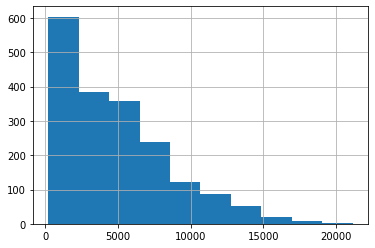

In [73]:
## Límite de crédito entre la edad
val['Lim_x_edad'] = val['LIMIT_BAL'] / val['AGE']
num += ['Lim_x_edad']
val['Lim_x_edad'].hist()

In [74]:
## Todas las variables numéricas entre el límite de crédito
for x in num:
    val[f'{x}_lim'] = val[x] / val['LIMIT_BAL']

lim = [col for col in val.columns if col.endswith('lim')]
num += lim
val[lim].sample(4)

,LIMIT_BAL_lim,AGE_lim,BILL_AMT1_lim,BILL_AMT2_lim,BILL_AMT3_lim,BILL_AMT4_lim,BILL_AMT5_lim,BILL_AMT6_lim,PAY_AMT1_lim,PAY_AMT2_lim,PAY_AMT3_lim,PAY_AMT4_lim,PAY_AMT5_lim,PAY_AMT6_lim,DIF_ant_1vs2_lim,DIF_ant_1vs3_lim,DIF_ant_1vs4_lim,DIF_ant_1vs5_lim,DIF_ant_1vs6_lim,DIF_ant_2vs1_lim,DIF_ant_2vs3_lim,DIF_ant_2vs4_lim,DIF_ant_2vs5_lim,DIF_ant_2vs6_lim,DIF_ant_3vs1_lim,DIF_ant_3vs2_lim,DIF_ant_3vs4_lim,DIF_ant_3vs5_lim,DIF_ant_3vs6_lim,DIF_ant_4vs1_lim,DIF_ant_4vs2_lim,DIF_ant_4vs3_lim,DIF_ant_4vs5_lim,DIF_ant_4vs6_lim,DIF_ant_5vs1_lim,DIF_ant_5vs2_lim,DIF_ant_5vs3_lim,DIF_ant_5vs4_lim,DIF_ant_5vs6_lim,DIF_ant_6vs1_lim,DIF_ant_6vs2_lim,DIF_ant_6vs3_lim,DIF_ant_6vs4_lim,DIF_ant_6vs5_lim,Prom_monto_from_2_to_1_lim,Prom_monto_from_3_to_1_lim,Prom_monto_from_3_to_2_lim,Prom_monto_from_4_to_1_lim,Prom_monto_from_4_to_2_lim,Prom_monto_from_4_to_3_lim,Prom_monto_from_5_to_1_lim,Prom_monto_from_5_to_2_lim,Prom_monto_from_5_to_3_lim,Prom_monto_from_5_to_4_lim,Prom_monto_from_6_to_1_lim,Prom_monto_from_6_to_2_lim,Prom_monto_from_6_to_3_lim,Prom_monto_from_6_to_4_lim,Prom_monto_from_6_to_5_lim,Prom_pago_from_2_to_1_lim,Prom_pago_from_3_to_1_lim,Prom_pago_from_3_to_2_lim,Prom_pago_from_4_to_1_lim,Prom_pago_from_4_to_2_lim,Prom_pago_from_4_to_3_lim,Prom_pago_from_5_to_1_lim,Prom_pago_from_5_to_2_lim,Prom_pago_from_5_to_3_lim,Prom_pago_from_5_to_4_lim,Prom_pago_from_6_to_1_lim,Prom_pago_from_6_to_2_lim,Prom_pago_from_6_to_3_lim,Prom_pago_from_6_to_4_lim,Prom_pago_from_6_to_5_lim,Lim_x_edad_lim
1821,1.0,0.000760,0.115280,0.135720,0.181900,0.176060,0.179500,0.180160,0.025560,0.051740,0.000000,0.009340,0.006520,0.006580,0.063540,0.115280,0.105940,0.108760,0.108700,0.110160,0.135720,0.126380,0.129200,0.129140,0.156340,0.130160,0.172560,0.175380,0.175320,0.150500,0.124320,0.176060,0.169540,0.169480,0.153940,0.127760,0.179500,0.170160,0.172920,0.154600,0.128420,0.180160,0.170820,0.173640,0.125500,0.144300,0.158810,0.152240,0.164560,0.178980,0.157692,0.168295,0.179153,0.177780,0.161437,0.170668,0.179405,0.178573,0.179830,0.038650,0.025767,0.025870,0.021660,0.020360,0.004670,0.018632,0.016900,0.005287,0.007930,0.016623,0.014836,0.005610,0.007480,0.006550,0.026316
241,1.0,0.000193,0.114640,0.086607,0.022033,0.074427,0.125353,0.152607,0.013413,0.022067,0.074427,0.125333,0.066667,0.112733,0.092573,0.040213,-0.010693,0.047973,0.001907,0.073193,0.012180,-0.038727,0.019940,-0.026127,0.008620,-0.000033,-0.103300,-0.044633,-0.090700,0.061013,0.052360,0.000000,0.007760,-0.038307,0.111940,0.103287,0.050927,0.000020,0.012620,0.139193,0.130540,0.078180,0.027273,0.085940,0.100623,0.074427,0.054320,0.074427,0.061022,0.048230,0.084612,0.077105,0.073938,0.099890,0.095944,0.092205,0.093605,0.117462,0.138980,0.017740,0.036636,0.048247,0.058810,0.073942,0.099880,0.060381,0.072123,0.088809,0.096000,0.069107,0.080245,0.094790,0.101578,0.089700,0.034483
696,1.0,0.000103,0.015445,0.027672,0.012066,0.011255,-0.001897,-0.001897,0.053445,0.000000,0.011386,0.000000,0.000000,0.004310,0.015445,0.004059,0.015445,0.015445,0.011134,-0.025772,0.016286,0.027672,0.027672,0.023362,-0.041379,0.012066,0.012066,0.012066,0.007755,-0.042190,0.011255,-0.000131,0.011255,0.006945,-0.055341,-0.001897,-0.013283,-0.001897,-0.006207,-0.055341,-0.001897,-0.013283,-0.001897,-0.001897,0.021559,0.018394,0.019869,0.016609,0.016998,0.011660,0.012908,0.012274,0.007141,0.004679,0.010441,0.009440,0.004882,0.002487,-0.001897,0.026722,0.021610,0.005693,0.016208,0.003795,0.005693,0.012966,0.002847,0.003795,0.000000,0.011524,0.003139,0.003924,0.001437,0.002155,0.033333
1695,1.0,0.000933,0.290133,0.323267,0.367400,0.401067,0.404467,0.414633,0.043333,0.049600,0.049933,0.020000,0.016667,0.025000,0.240533,0.240200,0.270133,0.273467,0.265133,0.279933,0.273333,0.303267,0.306600,0.298267,0.324067,0.317800,0.347400,0.350733,0.342400,0.357733,0.351467,0.351133,0.384400,0.376067,0.361133,0.354867,0.354533,0.384467,0.379467,0.371300,0.365033,0.364700,0.394633,0.397967,0.306700,0.326933,0.345333,0.345467,0.363911,0.3842

#### Categóricas

In [75]:
## Al parecer podemos agrupar los retrasos en pago mayores a dos meses para todos los meses
for col in estatus:
    display(val[col].value_counts(1).reset_index().sort_values(by = 'index').cumsum().head(5))

,index,PAY_1
1,-1,0.200000
3,-1-2,0.297600
0,-1-20,0.774400
2,-1-201,0.901333
4,-1-2012,0.991467


,index,PAY_2
1,-1,0.215467
2,-1-2,0.347733
0,-1-20,0.854400
6,-1-201,0.856533
3,-1-2012,0.987200


,index,PAY_3
1,-1,0.210667
2,-1-2,0.353067
0,-1-20,0.863467
9,-1-201,0.864000
3,-1-2012,0.985600


,index,PAY_4
1,-1,0.205333
2,-1-2,0.355200
0,-1-20,0.884267
9,-1-201,0.884800
3,-1-2012,0.989333


,index,PAY_5
1,-1,0.192000
2,-1-2,0.348267
0,-1-20,0.905067
3,-1-202,0.987733
4,-1-2023,0.993067


,index,PAY_6
1,-1,0.206933
2,-1-2,0.377067
0,-1-20,0.900800
3,-1-202,0.990400
4,-1-2023,0.996267


In [76]:
for col in estatus:
    aux = []
    for i in range(len(val)):
        if int(val[col][i]) >= 1:
            aux.append('>=1')
        else:
            aux.append(val[col][i])
    val[col] = aux

for col in estatus:
    display(val[col].value_counts(1).reset_index().sort_values(by = 'index'))

,index,PAY_1
2,-1,0.2000
3,-2,0.0976
0,0,0.4768
1,>=1,0.2256


,index,PAY_2
1,-1,0.215467
3,-2,0.132267
0,0,0.506667
2,>=1,0.145600


,index,PAY_3
1,-1,0.210667
2,-2,0.142400
0,0,0.510400
3,>=1,0.136533


,index,PAY_4
1,-1,0.205333
2,-2,0.149867
0,0,0.529067
3,>=1,0.115733


,index,PAY_5
1,-1,0.192000
2,-2,0.156267
0,0,0.556800
3,>=1,0.094933


,index,PAY_6
1,-1,0.206933
2,-2,0.170133
0,0,0.523733
3,>=1,0.099200


In [77]:
## Monto negativo?
val[monto].min()

BILL_AMT1    -9095.0
BILL_AMT2   -30000.0
BILL_AMT3   -10608.0
BILL_AMT4    -2230.0
BILL_AMT5    -6666.0
BILL_AMT6    -6948.0
dtype: float64

In [78]:
## Se crean variables auxiliares para definir si un monto es negativo
for col in monto:
    aux = []
    for i in range(len(val)):
        if int(val[col][i]) < 0:
            aux.append('negativo')
        else:
            aux.append('positivo')
    val[f'{col}_negativos'] = aux
    cat += [f'{col}_negativos']

In [79]:
for col in [x for x in cat if x.endswith('_negativos')]:
    display(val[col].value_counts(1).reset_index())

,index,BILL_AMT1_negativos
0,positivo,0.9776
1,negativo,0.0224


,index,BILL_AMT2_negativos
0,positivo,0.972267
1,negativo,0.027733


,index,BILL_AMT3_negativos
0,positivo,0.973867
1,negativo,0.026133


,index,BILL_AMT4_negativos
0,positivo,0.977067
1,negativo,0.022933


,index,BILL_AMT5_negativos
0,positivo,0.978667
1,negativo,0.021333


,index,BILL_AMT6_negativos
0,positivo,0.980267
1,negativo,0.019733


### Predicción

In [80]:
## Sólo la variable ID no está considerada como numérica o categórica
[x for x in val.columns if x not in cat+num]

['CUSTOMER_ID']

In [81]:
## Muchas muchas columnas
len(val.columns)

166

In [82]:
val[cat].columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1_negativos', 'BILL_AMT2_negativos',
       'BILL_AMT3_negativos', 'BILL_AMT4_negativos', 'BILL_AMT5_negativos',
       'BILL_AMT6_negativos'],
      dtype='object')

In [83]:
val[num].columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       ...
       'Prom_pago_from_5_to_1_lim', 'Prom_pago_from_5_to_2_lim',
       'Prom_pago_from_5_to_3_lim', 'Prom_pago_from_5_to_4_lim',
       'Prom_pago_from_6_to_1_lim', 'Prom_pago_from_6_to_2_lim',
       'Prom_pago_from_6_to_3_lim', 'Prom_pago_from_6_to_4_lim',
       'Prom_pago_from_6_to_5_lim', 'Lim_x_edad_lim'],
      dtype='object', length=165)

In [84]:
ls_best

['LIMIT_BAL',
 'Prom_pago_from_2_to_1',
 'Prom_pago_from_3_to_1',
 'Prom_pago_from_3_to_2',
 'Prom_pago_from_4_to_1',
 'Prom_pago_from_5_to_1',
 'Prom_pago_from_6_to_1',
 'Prom_pago_from_6_to_2',
 'Lim_x_edad',
 'AGE_lim',
 'BILL_AMT5_lim',
 'BILL_AMT6_lim',
 'DIF_ant_5vs1_lim',
 'DIF_ant_5vs2_lim',
 'DIF_ant_5vs3_lim',
 'DIF_ant_5vs4_lim',
 'DIF_ant_5vs6_lim',
 'DIF_ant_6vs1_lim',
 'DIF_ant_6vs2_lim',
 'DIF_ant_6vs3_lim',
 'DIF_ant_6vs4_lim',
 'DIF_ant_6vs5_lim',
 'Prom_monto_from_6_to_4_lim',
 'Prom_monto_from_6_to_5_lim',
 'PAY_1_0',
 'PAY_1_>=1',
 'PAY_2_0',
 'PAY_2_>=1',
 'PAY_3_0',
 'PAY_3_>=1',
 'PAY_4_>=1',
 'PAY_5_>=1',
 'PAY_6_>=1']

In [85]:
[x for x in ls_best if x not in num]

['PAY_1_0',
 'PAY_1_>=1',
 'PAY_2_0',
 'PAY_2_>=1',
 'PAY_3_0',
 'PAY_3_>=1',
 'PAY_4_>=1',
 'PAY_5_>=1',
 'PAY_6_>=1']

In [86]:
estatus

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [96]:
modelo = val[num].join(pd.get_dummies(val[cat]))
modelo = pd.DataFrame(mm_x.transform(modelo), columns = modelo.columns).copy()
modelo = modelo[ls_best].copy()
modelo.sample(4)

,LIMIT_BAL,Prom_pago_from_2_to_1,Prom_pago_from_3_to_1,Prom_pago_from_3_to_2,Prom_pago_from_4_to_1,Prom_pago_from_5_to_1,Prom_pago_from_6_to_1,Prom_pago_from_6_to_2,Lim_x_edad,AGE_lim,BILL_AMT5_lim,BILL_AMT6_lim,DIF_ant_5vs1_lim,DIF_ant_5vs2_lim,DIF_ant_5vs3_lim,DIF_ant_5vs4_lim,DIF_ant_5vs6_lim,DIF_ant_6vs1_lim,DIF_ant_6vs2_lim,DIF_ant_6vs3_lim,DIF_ant_6vs4_lim,DIF_ant_6vs5_lim,Prom_monto_from_6_to_4_lim,Prom_monto_from_6_to_5_lim,PAY_1_0,PAY_1_>=1,PAY_2_0,PAY_2_>=1,PAY_3_0,PAY_3_>=1,PAY_4_>=1,PAY_5_>=1,PAY_6_>=1
838,0.173913,0.015870,0.057494,0.074294,0.044827,0.061800,0.058781,0.071829,0.202451,0.028559,0.069841,0.132823,0.150782,0.106284,0.171536,0.072021,0.084516,0.186690,0.157620,0.203650,0.137758,0.134342,0.074621,0.098681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1118,0.057971,0.018985,0.022041,0.021258,0.022913,0.025630,0.025691,0.027857,0.049861,0.124501,0.069753,0.131727,0.149741,0.105198,0.173303,0.070408,0.083899,0.184423,0.155297,0.204880,0.134810,0.134342,0.073556,0.098131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,0.101449,0.174228,0.174384,0.252235,0.135964,0.133694,0.123370,0.160500,0.066709,0.094536,0.070441,0.132542,0.151803,0.090482,0.170738,0.072639,0.083543,0.186963,0.137502,0.201725,0.137466,0.134342,0.075265,0.098877,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
779,0.275362,0.034953,0.050806,0.034367,0.081458,0.072893,0.074733,0.076729,0.182086,0.032435,0.070972,0.131591,0.151017,0.107885,0.174679,0.070408,0.085406,0.184425,0.156937,0.205069,0.133172,0.136006,0.073844,0.098729,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [97]:
resultado = pd.DataFrame(val['CUSTOMER_ID']).join(pd.DataFrame(logreg.predict(modelo),
                                                               columns = ['y_hat']))
resultado.sample(4)

,CUSTOMER_ID,y_hat
1737,2217,0.0
1372,9801,1.0
695,24470,0.0
1094,10452,1.0


In [99]:
df['incumple'].mean() , resultado['y_hat'].mean()

(0.23894576345022872, 0.2576)

In [100]:
resultado.to_csv(liga + 'FloresHernandezEfrainIsmael_DefaultPayment.csv',
                index = False)